In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('eda_input_validation_joining_dataset1.csv')

In [11]:
df.head()

date  number_of_strikes center_point_geom  longitude  latitude
0  2018-01-03                194     POINT(-75 27)      -75.0      27.0
1  2018-01-03                 41   POINT(-78.4 29)      -78.4      29.0
2  2018-01-03                 33   POINT(-73.9 27)      -73.9      27.0
3  2018-01-03                 38   POINT(-73.8 27)      -73.8      27.0
4  2018-01-03                 92     POINT(-79 28)      -79.0      28.0

In [12]:
print(df.dtypes)

date                  object
number_of_strikes      int64
center_point_geom     object
longitude            float64
latitude             float64
dtype: object


In [13]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

date                 datetime64[ns]
number_of_strikes             int64
center_point_geom            object
longitude                   float64
latitude                    float64
dtype: object


In [14]:
# Count the number of missing values in each column
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
longitude            0
latitude             0
dtype: int64

In [15]:
#check ranges for all variables
df.describe(include ='all')

date  number_of_strikes  center_point_geom  \
count                         3401012       3.401012e+06            3401012   
unique                            NaN                NaN             170855   
top                               NaN                NaN  POINT(-81.5 22.5)   
freq                              NaN                NaN                108   
mean    2018-07-13 03:32:02.018504960       1.311403e+01                NaN   
min               2018-01-01 00:00:00       1.000000e+00                NaN   
25%               2018-06-04 00:00:00       2.000000e+00                NaN   
50%               2018-07-18 00:00:00       4.000000e+00                NaN   
75%               2018-08-24 00:00:00       1.200000e+01                NaN   
max               2018-12-31 00:00:00       2.211000e+03                NaN   
std                               NaN       3.212099e+01                NaN   

           longitude      latitude  
count   3.401012e+06  3.401012e+06  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean   -9.081778e+01  3.374688e+01  
min    -1.418000e+02  1.660000e+01  
25%    -1.008000e+02  2.760000e+01  
50%    -9.070000e+01  3.350000e+01  
75%    -8.130000e+01  3.970000e+01  
max    -4.320000e+01  5.170000e+01  
std     1.296593e+01  7.838555e+00

In [16]:
full_date_range = pd.date_range(start = '2018-01-01', end = '2018-12-31')
full_date_range.difference(df['date'])

DatetimeIndex(['2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
               '2018-09-18', '2018-09-19', '2018-12-01', '2018-12-02'],
              dtype='datetime64[ns]', freq=None)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='number_of_strikes'>

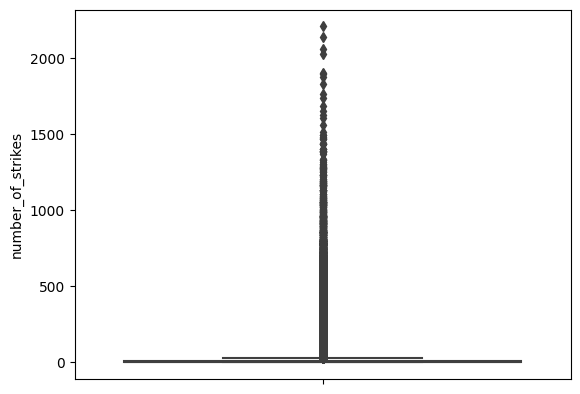

In [18]:
# Make a boxplot to see the range better
sns.boxplot(y = df['number_of_strikes'])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='number_of_strikes'>

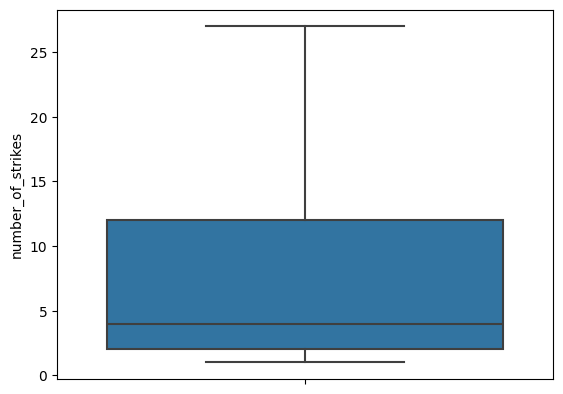

In [20]:
# Plot again without the outliers to see where the majority of data is
##df.groupby(categorical_index, observed=True)

sns.boxplot(y = df['number_of_strikes'], showfliers =False, )

In [22]:
#Plot point on the map to verify data is all from us.
df_points = df[['latitude', 'longitude']].drop_duplicates() #get unique point
df_points.head()

latitude  longitude
0      27.0      -75.0
1      29.0      -78.4
2      27.0      -73.9
3      27.0      -73.8
4      28.0      -79.0

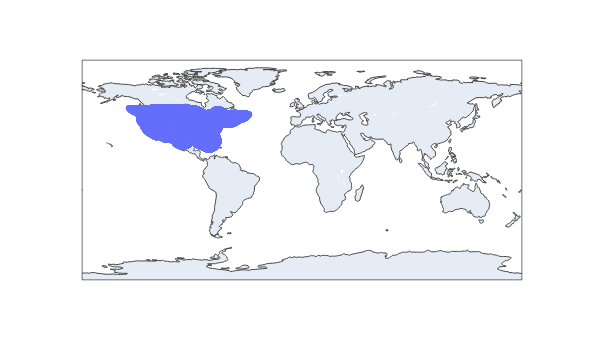

In [25]:
#Plot point on the map to verify data is all from us.
df_points = df[['latitude', 'longitude']].drop_duplicates() #get unique point
p = px.scatter_geo(df_points, lat ='latitude', lon='longitude')
p.show()